In [75]:
import numpy as np
import pandas as pd

# Visualisation
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

# data
import yfinance as yf
import pandas_datareader as pdr

sns.set(color_codes = True)
pd.set_option('display.max_rows', 50)

In [76]:
# Check version
print('Numpy: ', np.__version__)
print('Pandas: ', pd.__version__)

Numpy:  1.19.2
Pandas:  1.1.5


In [ ]:
# Business Question
# To find the correlation between EV stock markets
# Correlation with traditional Energy commodities and Covid Vaccine 19 stocks  
# Maybe do some price prediction (patterns, candle stick, simple ML)

In [81]:
# data = yf.download(tickers='TSLA', start='2020-01-01', end='2021-01-01', interval='5m')
# Get Tesla
tsla = pdr.DataReader('TSLA', data_source='yahoo', start='2015-01-01', end='2020-12-31').reset_index()
tsla

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-12-31,45.136002,44.450001,44.618000,44.481998,11487500.0,44.481998
1,2015-01-02,44.650002,42.652000,44.574001,43.862000,23822000.0,43.862000
2,2015-01-05,43.299999,41.431999,42.910000,42.018002,26842500.0,42.018002
3,2015-01-06,42.840000,40.841999,42.012001,42.256001,31309500.0,42.256001
4,2015-01-07,42.956001,41.956001,42.669998,42.189999,14842000.0,42.189999
...,...,...,...,...,...,...,...
1507,2020-12-24,666.090027,641.000000,642.989990,661.770020,22865600.0,661.770020
1508,2020-12-28,681.400024,660.799988,674.510010,663.690002,32278600.0,663.690002
1509,2020-12-29,669.900024,655.000000,661.000000,665.989990,22910800.0,665.989990
1510,2020-12-30,696.599976,668.359985,672.000000,694.780029,42846000.0,694.780029


In [41]:
nio = pdr.DataReader('NIO', data_source='yahoo', start='2015-01-01', end='2020-12-31').reset_index()
nio

,Date,High,Low,Open,Close,Volume,Adj Close
0,2018-09-12,6.930000,5.350000,6.000000,6.600000,66849000,6.600000
1,2018-09-13,12.690000,6.520000,6.620000,11.600000,158346500,11.600000
2,2018-09-14,13.800000,9.220000,12.660000,9.900000,172473600,9.900000
3,2018-09-17,9.750000,8.500000,9.610000,8.500000,56323900,8.500000
4,2018-09-18,9.100000,7.670000,8.730000,7.680000,41827600,7.680000
...,...,...,...,...,...,...,...
576,2020-12-24,47.130001,45.349998,46.880001,45.770000,60582500,45.770000
577,2020-12-28,46.849998,43.669998,46.669998,44.060001,105078000,44.060001
578,2020-12-29,46.279999,42.230000,43.700001,46.139999,120689900,46.139999
579,2020-12-30,48.380001,45.720001,46.500000,48.380001,116691700,48.380001


In [42]:
xpev = pdr.DataReader('XPEV', data_source='yahoo', start='2015-01-01', end='2020-12-31').reset_index()
xpev

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-08-27,25.000000,21.200001,23.100000,21.219999,82219700,21.219999
1,2020-08-28,24.400000,22.020000,23.980000,22.790001,44847300,22.790001
2,2020-08-31,22.790001,20.330000,22.690001,20.500000,20816000,20.500000
3,2020-09-01,21.790001,20.100000,20.980000,21.610001,15291400,21.610001
4,2020-09-02,22.000000,20.379999,21.990000,21.090000,9090100,21.090000
...,...,...,...,...,...,...,...
83,2020-12-24,44.200001,41.639999,43.040001,41.869999,15453300,41.869999
84,2020-12-28,41.860001,37.500000,41.790001,38.009998,30945500,38.009998
85,2020-12-29,41.818001,37.599998,38.750000,41.549999,24437000,41.549999
86,2020-12-30,43.240002,41.164001,42.830002,42.290001,20341500,42.290001


<h2>I. TESLA</h2> 

In [43]:
row, col = tsla.shape
print(f'tsla has {row} rows and {col} columns')

tsla has 1512 rows and 7 columns


In [44]:
tsla.isnull().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [45]:
tsla.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [46]:
tsla.dtypes

Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Adj Close           float64
dtype: object

In [48]:
tsla.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
High,1512.0,95.24,115.04,30.99,46.17,57.64,70.47,7.187200e+02
Low,1512.0,90.96,108.58,28.21,44.79,55.49,68.45,6.911200e+02
Open,1512.0,93.14,111.87,28.46,45.53,56.63,69.51,6.999900e+02
Close,1512.0,93.30,112.46,28.73,45.41,56.83,69.49,7.056700e+02
Volume,1512.0,40093400.99,29636985.94,3540000.00,21270750.00,30802500.00,47785025.00,3.046940e+08
Adj Close,1512.0,93.30,112.46,28.73,45.41,56.83,69.49,7.056700e+02


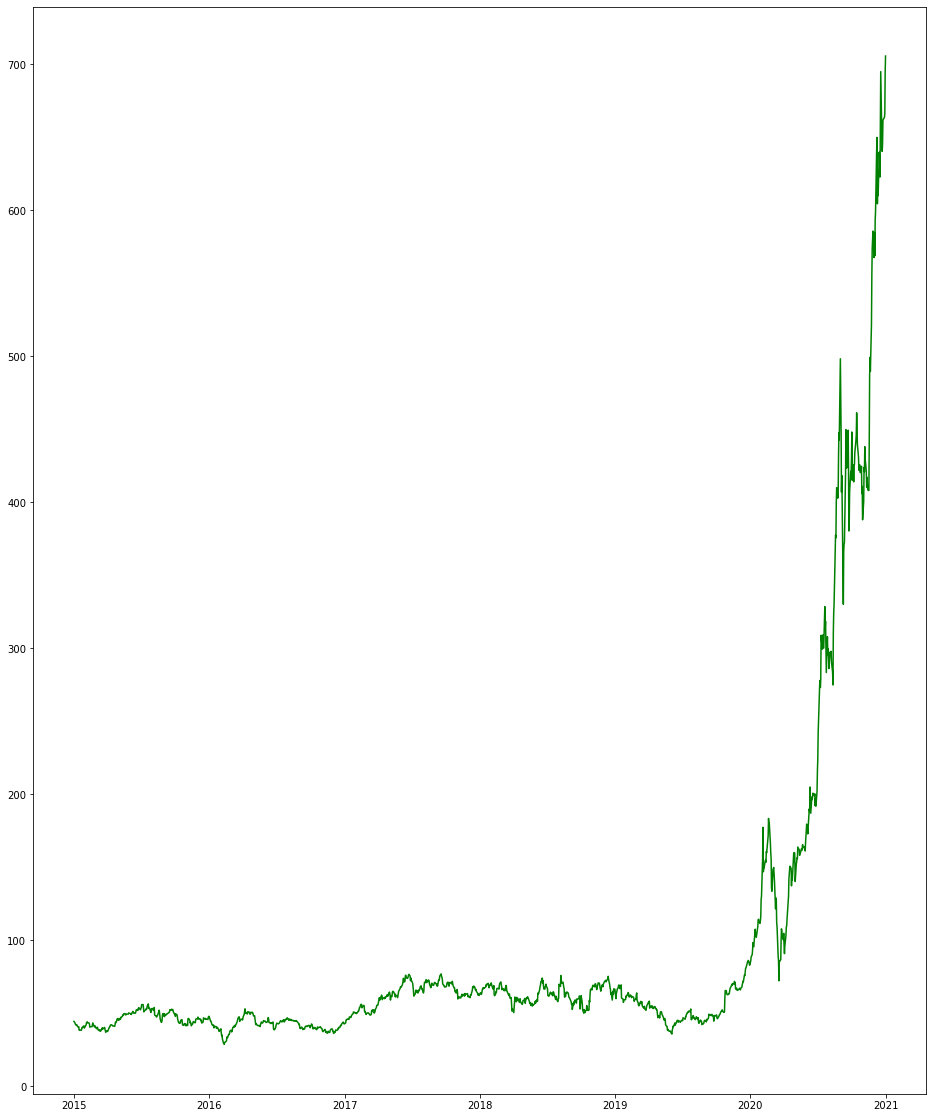

In [54]:
plt.figure(figsize=(16,20))

tsla_date = pd.to_datetime(tsla["Date"])
plt.plot(tsla_date, tsla.Close, color='green')

(array([442., 535., 277.,  21.,  24.,   7.,  20.,  31.,  12.,  14.,   2.,
          1.,   0.,   4.,   6.,  16.,   5.,   0.,   2.,   5.,   4.,  19.,
         19.,  13.,   1.,   3.,   2.,   1.,   0.,   1.,   3.,   3.,   3.,
          3.,   6.,   4.,   0.,   3.]),
 array([ 28.73399925,  46.54810409,  64.36220892,  82.17631375,
         99.99041858, 117.80452342, 135.61862825, 153.43273308,
        171.24683792, 189.06094275, 206.87504758, 224.68915242,
        242.50325725, 260.31736208, 278.13146692, 295.94557175,
        313.75967658, 331.57378142, 349.38788625, 367.20199108,
        385.01609591, 402.83020075, 420.64430558, 438.45841041,
        456.27251525, 474.08662008, 491.90072491, 509.71482975,
        527.52893458, 545.34303941, 563.15714425, 580.97124908,
        598.78535391, 616.59945874, 634.41356358, 652.22766841,
        670.04177324, 687.85587808, 705.66998291]),
 <BarContainer object of 38 artists>)

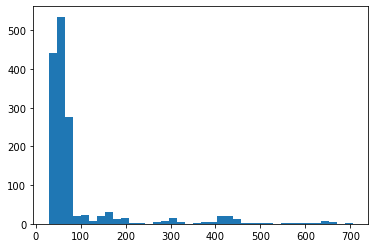

In [59]:
bins = int(np.sqrt(tsla.Close.count()))
plt.hist(tsla.Close, bins=bins)

{'whiskers': [<matplotlib.lines.Line2D at 0x120b44760>,
 'caps': [<matplotlib.lines.Line2D at 0x120b4fd30>,
 'boxes': [<matplotlib.lines.Line2D at 0x121f095b0>],
 'medians': [<matplotlib.lines.Line2D at 0x120c7a760>],
 'fliers': [<matplotlib.lines.Line2D at 0x120c7ae20>],
 'means': []}

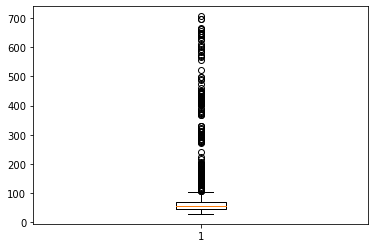

In [60]:
plt.boxplot(tsla.Close)

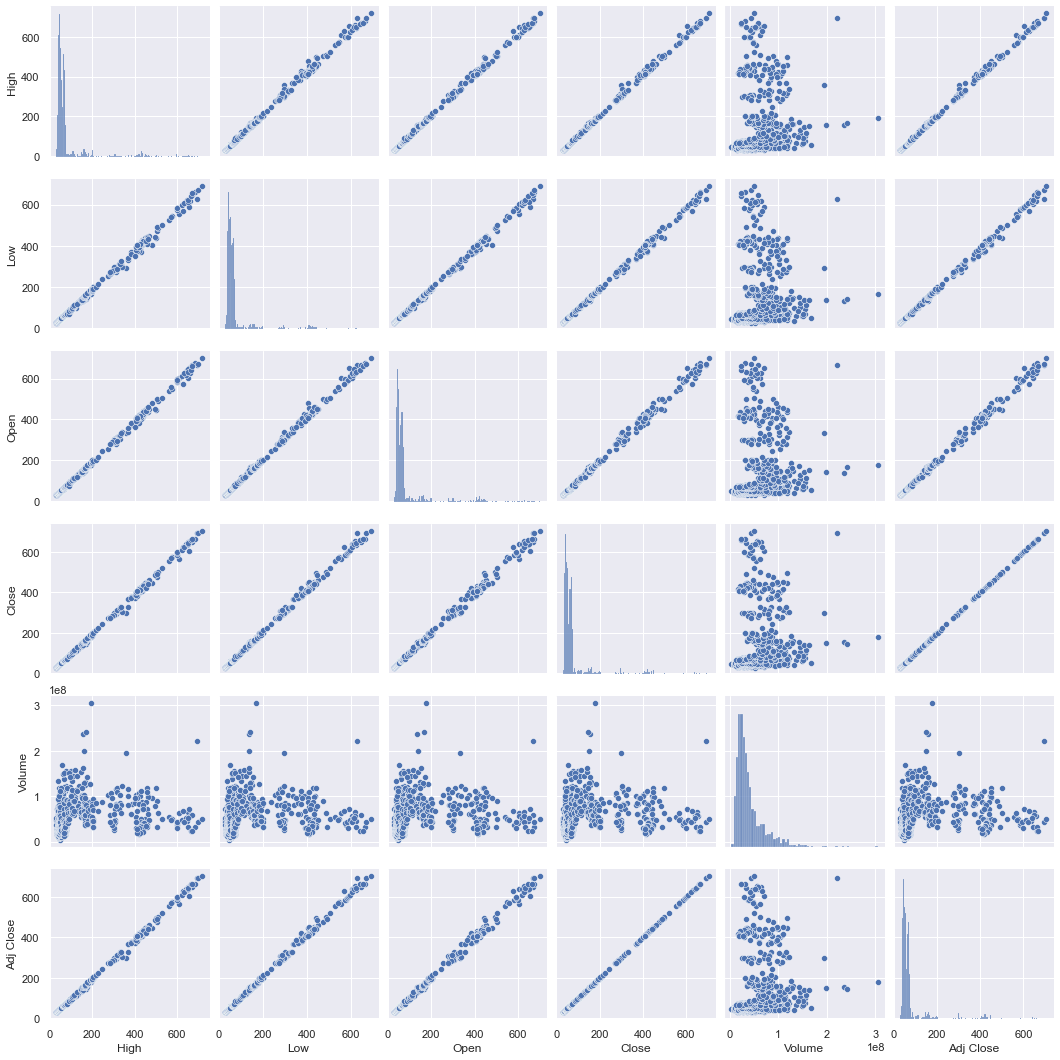

In [73]:
sns.pairplot(tsla)

In [82]:
tsla.corr()

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.999245,0.999494,0.999566,0.317734,0.999566
Low,0.999245,1.000000,0.999372,0.999374,0.299662,0.999374
Open,0.999494,0.999372,1.000000,0.998895,0.308624,0.998895
Close,0.999566,0.999374,0.998895,1.000000,0.309531,1.000000
Volume,0.317734,0.299662,0.308624,0.309531,1.000000,0.309531
Adj Close,0.999566,0.999374,0.998895,1.000000,0.309531,1.000000
